# <center> Walmart Sales Prediction

## Learning Objectives

At the end of this session, you will be able to

1. Perform exploratory analysis 
2. Visualize data in various formats and extract insights before modeling
3. Handle different data types, data quality issue
4. Use pipeline to streamline the workflow 
5. Analyze importance of feature with respect 


Walmart is a renowned retail corporation that operates a chain of hypermarkets. Here, Walmart has provided a data combining of 45 stores including store information and monthly sales. The data is provided on weekly basis. Walmart tries to find the impact of holidays on the sales of store. For which it has included four holidays’ weeks into the dataset which are Christmas, Thanksgiving, Super bowl, Labor Day. Here we are owing to Analyze the dataset given. Before doing that, let me point out the objective of this analysis. 

### Assume you are a ML Scientist at Walmart and you are given the following business objective

# Business Objectives

Our Main Objective is to understand weekly sales data of different stores and build a predictive model for sale forecasting. We want you to go deep into the data and analyze it to generate insights for sale forecasting.

1. Each store belongs to certain type, size. Also a store can have multiple department. We also want to understand the affect of different macroeconomic/external factors like fuel price, temperature. You need to also investigate how inclusion of holidays in a week soars/diminishes the sales in store. This would involve doing an exploratory data analysis.

2. We also want to evaluate data quality and apply appropriate transformation to the data for modeling

3. Finally we want to select important feature by understanding relation between features and weekly sales



### Importing Necessary Libraries and Data

In [1]:
import numpy as np      # To use np.arrays
import pandas as pd     # To use dataframes
from pandas.plotting import autocorrelation_plot as auto_corr

# To plot
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns
import math
from datetime import datetime
from datetime import timedelta
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
#from sklearn.pipeline import make_pipeline, Pipeline

from sklearn import metrics
from sklearn.linear_model import LinearRegression 
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
#from sklearn.pipeline import Pipeline

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

from sklearn.feature_selection import mutual_info_regression
from scipy.stats import f_oneway


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from imblearn import FunctionSampler
from imblearn.pipeline import make_pipeline
from imblearn import pipeline


import warnings
warnings.filterwarnings("ignore")



pd.options.display.max_columns=100 # to see columns 


### Read Data

In [2]:
df_store = pd.read_csv('https://raw.githubusercontent.com/dpaul0501/FB_MLE_Week3/main/dat/stores.csv') #store data

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/dpaul0501/FB_MLE_Week3/main/dat/train.csv') # train set

In [4]:
df_features = pd.read_csv('https://raw.githubusercontent.com/dpaul0501/FB_MLE_Week3/main/dat/features.csv') #external information

### Dataset eyeballing


1. Use head() / tail() command to see few rows

2. You can also sample a few rows using .sample(n=5) command which will sample 5 random rows

Use the next few cells you will  eyeball to help you prepare your data better. Note down you high level observations.

In [5]:
df_store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [6]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [7]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


## Data Preparation (10 mins)

ML Scientist should always look to collect and leverage more data.

1. For each store we have the weekly sale data - which is the primary data source for weekly sale prediction
2. We also have store related information
3. There additional macroeconomic and holiday related features.

### Task 1
Combine the 3 datasets into one dataframe. This will help you to get all your data in a single table

 ### Task 2
Discuss on the type of the join (left, right, inner, cross) to be used and implications. Make appropriate assumptions to support your decision wherever needed.

### Task 3
How to check data sanity post your joins?


In [8]:
# merging 3 different sets
df = df_train.merge(df_features, on=['Store', 'Date'], how='left').merge(df_store, on=['Store'], how='left')
df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [9]:
 # removing dublicated column
df.drop('IsHoliday_y', axis=1, inplace=True)
df.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True) # rename the column

In [10]:
df.head() # last ready data set

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [11]:
df.shape

(421570, 16)

### Sanity Checks


In [12]:
df['Store'].nunique() # number of different values

45

In [13]:
df['Dept'].nunique() # number of different values

81

## Dervied Features
In addition to the features we get from raw data, we can add derived features as well. In the current exercise, there is a date field. We can derive weekday, month, year. Also we can map quater corresponding to the date.

In [14]:
df.Date=pd.to_datetime(df.Date)

df['week'] = df.Date.dt.week
df['month'] = df.Date.dt.month
df['year'] = df.Date.dt.year

# you can also map quarter if you want using
#df['Monthly_Quarter'] = df.month.map({1:'Q1',2:'Q1',3:'Q1',4:'Q2',5:'Q2',6:'Q2',7:'Q3',8:'Q3',9:'Q3',10:'Q4',11:'Q4',12:'Q4'})



numericalFeatures = ['Temperature','CPI','Unemployment','Size']
categoricalFeatures = ['year','month','IsHoliday','Type','week']

idFeatures = ['Dept','Store']



In [15]:
#seggregate features and target
target = 'Weekly_Sales'
features = [i for i in df.columns if i not in [target]]
original_df = df.copy(deep=True)

df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week,month,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2,2010
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,6,2,2010
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,7,2,2010
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,8,2,2010
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,9,3,2010


### Task 4 (5 mins)
Split the data into training and test dataset. You can use sklearn library function for this train_test_split.
We will be using the training data for all our exploratory data analysis. The test data will be used as an unseen dataset to evaluate our model. Splitting your entire data before analysis and feature transformation will make sure there is no **data leakage**

Bonus question : What is the purpose of "random_state" parameter in train_test_split?

In [16]:

Train_df, Test_df = train_test_split(df, train_size=0.8, test_size=0.2, random_state=100)
Test_df.reset_index(drop=True,inplace=True)

print('Original set  ---> ',df.shape,'\nTraining set  ---> ',Train_df.shape,'\nTesting set   ---> ', Test_df.shape)

Original set  --->  (421570, 19) 
Training set  --->  (337256, 19) 
Testing set   --->  (84314, 19)


## Exploratory Data Analysis
Exploratory Data Analysis (EDA) is probably one of the most frequent term heard in ML. The objective of EDA is to explore and understand your data. There are two most popular ways we can do that:

1. Looking at descriptive statistics of features - mean, median, mode (categorical), percentile distribution, frequency (categorical)
2. Vizualizing the distribution of the features - box plot, bar plot, histogram, density plots

There are many ways to do EDA. But there are standard plots, statistics which are used in general. However you should think of interesting ways to vizualize and understand your data.
The key part of EDA is what insight are you getting and what can we do about those insights?



### Task1 (5 mins)
Understand the distribution of numberical variable including weekly sales using  histogram plot

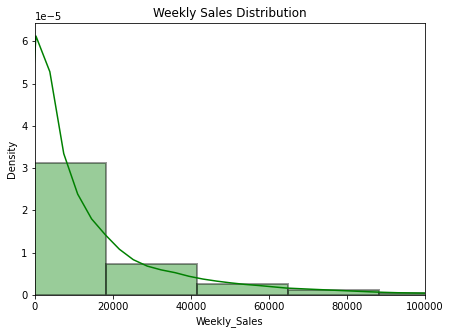

In [17]:
#Let us first analyze the distribution of the target variable

plt.figure(figsize=[7,5])
sns.distplot(Train_df[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Weekly Sales Distribution')
plt.xlim(0, 100000)
plt.show()

### Task2
Vizualize each numerical features - using box plot

<AxesSubplot:>

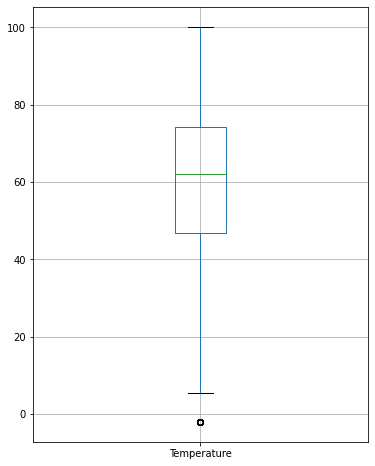

In [18]:
#sample box plot


Train_df.boxplot('Temperature',figsize=(6,8))


<AxesSubplot:xlabel='Temperature', ylabel='Density'>

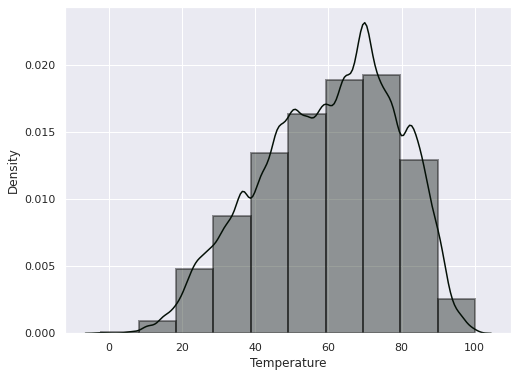

In [19]:
#sample box plot

sns.set(rc={'figure.figsize':(8,6)})
sns.distplot(Train_df['Temperature'],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))

### Box Plots

                                                Numeric Features Distribution                                                 


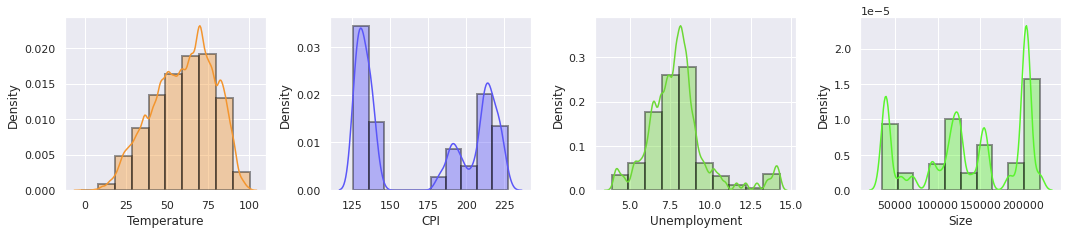

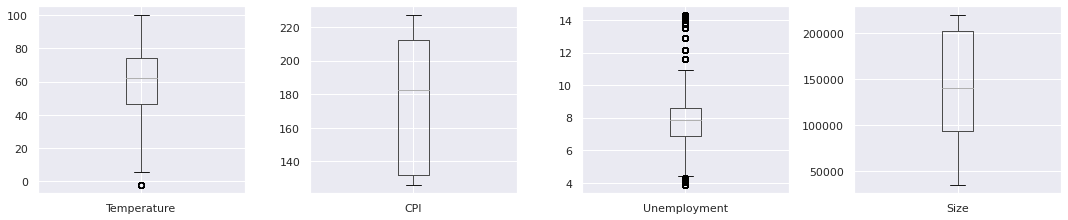

In [20]:
print('\033[1mNumeric Features Distribution'.center(130))

n=4

clr=['r','g','b','g','b','r']

plt.figure(figsize=[15,6*math.ceil(len(numericalFeatures)/n)])
for i in range(len(numericalFeatures)):
    plt.subplot(math.ceil(len(numericalFeatures)/3),n,i+1)
    sns.distplot(Train_df[numericalFeatures[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,6*math.ceil(len(numericalFeatures)/n)])
for i in range(len(numericalFeatures)):
    plt.subplot(math.ceil(len(numericalFeatures)/3),n,i+1)
    Train_df.boxplot(numericalFeatures[i])
plt.tight_layout()
plt.show()

### Note any observation/insights from distribution plots - Histogram and Box Plot


### Task 3 (10 mins)
Plots gives a visual representation. To get a better understanding of summary statistics, we can use describe() method. 
This method by default reports statistics mean, max, min, quantile distribution for numerical features.
For categorical feature it can be used to report counts, unique, mode etc.

Sometimes instead of looking at all features, we might want to aggregate data at certain dimensions and find summary statistics over aggregates. This is a great way to sneak peak into the distribution of your features. Also this can help you understand if you need any outlier detection (we will visit this later)

In the following cell try to inspect:

1. Summary statistics of numerical features
2. Summary statistics of all features
3. For each department we want to find the distribution (summary statistics) of average weekly sale across all stores. One way to implement this is
    a. For this first find mean weekly sale per store, department - using group_by()
    b. report the summary statistics of average weekly sales across each department by using summay over the aggregate data frame
 You can use a different way as suggested in (a) and (b) to achieve the same result. Feel free to be creative!
   

In [21]:
Train_df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,week,month,year
count,337256.000000,337256.000000,337256.000000,337256.000000,337256.000000,120750.000000,89105.000000,109801.000000,108158.000000,121356.000000,337256.000000,337256.000000,337256.000000,337256.000000,337256.000000,337256.000000
mean,22.206911,44.249024,15995.674802,60.103377,3.361357,7241.181865,3330.092988,1456.249993,3382.422906,4626.122631,171.202844,7.960733,136677.954738,25.828276,6.449641,2010.969338
std,12.777822,30.495551,22743.037804,18.448296,0.458867,8314.561066,9486.848901,9656.503280,6302.167222,5994.996323,39.159826,1.861854,60985.473104,14.148934,3.242741,0.796986
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000,1.000000,1.000000,2010.000000
25%,11.000000,18.000000,2081.677500,46.700000,2.933000,2230.800000,41.280000,5.100000,501.850000,1872.370000,132.022667,6.891000,93638.000000,14.000000,4.000000,2010.000000
50%,22.000000,37.000000,7617.605000,62.090000,3.452000,5336.520000,191.400000,24.600000,1479.910000,3358.940000,182.318780,7.866000,140167.000000,26.000000,6.000000,2011.000000
75%,33.000000,74.000000,20204.030000,74.290000,3.738000,9198.080000,1919.790000,103.990000,3592.000000,5556.150000,212.416993,8.572000,202505.000000,38.000000,9.000000,2012.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,52.000000,12.000000,2012.000000


In [22]:
Train_df.describe(include='all')

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week,month,year
count,337256.000000,337256.000000,337256,337256.000000,337256,337256.000000,337256.000000,120750.000000,89105.000000,109801.000000,108158.000000,121356.000000,337256.000000,337256.000000,337256,337256.000000,337256.000000,337256.000000,337256.000000
unique,NaN,NaN,143,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN
top,NaN,NaN,2011-12-23 00:00:00,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,NaN,NaN,NaN,NaN
freq,NaN,NaN,2463,NaN,313536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,172258,NaN,NaN,NaN,NaN
first,NaN,NaN,2010-02-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2012-10-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,22.206911,44.249024,NaN,15995.674802,NaN,60.103377,3.361357,7241.181865,3330.092988,1456.249993,3382.422906,4626.122631,171.202844,7.960733,NaN,136677.954738,25.828276,6.449641,2010.969338
std,12.777822,30.495551,NaN,22743.037804,NaN,18.448296,0.458867,8314.561066,9486.848901,9656.503280,6302.167222,5994.996323,39.159826,1.861854,NaN,60985.473104,14.148934,3.242741,0.796986
min,1.000000,1.000000,NaN,-4988.940000,NaN,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,NaN,34875.000000,1.000000,1.000000,2010.000000
25%,11.000000,18.000000,NaN,2081.677500,NaN,46.700000,2.933000,2230.800000,41.280000,5.100000,501.850000,1872.370000,132.022667,6.891000,NaN,93638.000000,14.000000,4.000000,2010.000000


In [23]:
dimesnion_1 = 'Store'
dimension_2 = 'Dept'
variable = 'Weekly_Sales'
aggFunction = np.mean


store_dept_table = Train_df[[dimesnion_1,dimension_2,variable]].groupby([dimesnion_1,dimension_2]).mean('Weekly_Sales')
#note you can use  pd.pivot_table as well. The recommended way is to use group by
store_dept_table.unstack().describe()

Weekly_Sales                                                           \
Dept             1              2             3             4             5    
count     45.000000      45.000000     45.000000     45.000000     45.000000   
mean   19193.608465   43566.363951  11919.731738  25962.976305  21091.308684   
std    10093.270547   24867.117715   7590.416176  13123.985366  14427.781675   
min     2252.742261    7459.392946    296.549652   6048.901947    117.365225   
25%    11362.670783   23268.040275   7210.695214  14873.101161  13183.430085   
50%    18728.293103   42610.570748  11883.246724  24393.643182  20691.225179   
75%    22798.740331   58445.963925  17705.734188  32046.355932  28273.571500   
max    46984.647750  109390.783796  31627.507241  56412.885133  59472.700513   

                                                                             \
Dept             6             7             8             9             10   
count     45.000000     45.000000     45.000000     45.000000     45.000000   
mean    4406.228511  24041.039212  30203.568360  19928.838674  18306.195593   
std     2730.362951  16754.902893  18216.701648  14633.651390  12756.756582   
min        3.333333    379.572917   3384.589569     42.432990     77.262583   
25%     3209.932685  11203.370556  18220.254071  11025.790957  10733.119836   
50%     4941.519612  23556.895172  28672.875470  18837.776293  16870.053217   
75%     6231.747593  34335.006087  36421.824444  27968.433364  23377.752523   
max    10713.357083  60673.872336  86970.634018  64343.155678  47950.517339   

                                                                             \
Dept             11            12            13            14            16   
count     45.000000     45.000000     45.000000     45.000000     45.000000   
mean   14501.081463   4157.259070  30659.597567  14855.872768  14294.656494   
std     8457.714000   2715.953240  16126.433744   9883.189143   9073.788274   
min      171.434643     21.662900   6967.349722    726.691429    328.030081   
25%    11226.498000   2518.921441  17953.450431   8725.776560   7587.418273   
50%    14780.124324   4154.197073  28344.257903  15045.495727  14665.398729   
75%    20571.135690   5715.854286  41287.489573  21720.220776  21188.541754   
max    32196.984630  10728.287154  69552.716387  41188.528000  30023.253583   

                                                                            \
Dept             17            18           19            20            21   
count     45.000000     45.000000    38.000000     45.000000     45.000000   
mean   10176.754616   6898.759818  1307.939889   5190.124932   4995.390152   
std     7063.447286   4682.884094  1271.456114   3797.727134   3069.801498   
min      147.378667    282.568395    -9.104444     31.869000    203.472804   
25%     5690.671304   3371.287292    57.082639   2992.335586   3107.743393   
50%    10389.846000   6522.719271  1124.192512   5055.234842   4698.269912   
75%    14449.207064  10339.426279  1777.061586   6993.129043   7129.824483   
max    27411.929204  18127.778824  4551.052984  15598.575470  13530.389316   

                                                                             \
Dept             22            23            24            25            26   
count     45.000000     45.000000     45.000000     45.000000     45.000000   
mean    9311.463576  21470.209209   5346.484632   8847.830050   6820.861537   
std     6716.252036  15289.625189   3897.472046   6067.508946   4988.903766   
min       36.621455      5.240000      2.235000     21.030714      2.818000   
25%     6000.937748  11312.538783   2598.741927   5175.649130   2807.451963   
50%     8522.836944  20022.864727   4971.019333   7614.449369   6627.713482   
75%    13120.065678  32204.853333   8406.446000  14243.017500  10817.004380   
max    25662.709322  65856.238621  15625.303826  20996.637863  18386.607000   

                                                    

## What are your insights from average weekly sale of department over all stores?
Hints:
1. Do you observe an discrepancy in the number of unique department and Dept field
2. Are there departments with zero sales for a store? What to do about them? Make appropriate assumptions
3. Are there departments with negative sales? What to do about them? Make appropriate assumptions

In [24]:
Train_df.loc[Train_df['Weekly_Sales']<=0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week,month,year
197203,20,96,2011-12-23,-8.44,False,40.19,3.389,1483.17,80.15,2145.46,38.97,4180.29,212.236040,7.082,A,203742,51,12,2011
333179,35,19,2011-07-22,-5.94,False,82.28,3.811,NaN,NaN,NaN,NaN,NaN,139.796971,8.684,B,103681,29,7,2011
145789,15,78,2010-06-18,-7.00,False,65.83,2.942,NaN,NaN,NaN,NaN,NaN,132.473333,8.185,B,123737,24,6,2010
233439,24,54,2011-06-03,-14.12,False,73.12,4.069,NaN,NaN,NaN,NaN,NaN,134.855161,8.212,A,203819,22,6,2011
377316,40,54,2011-03-25,-3.00,False,28.89,3.624,NaN,NaN,NaN,NaN,NaN,133.958742,5.114,A,155083,12,3,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189831,20,19,2012-10-26,-3.97,False,60.04,3.882,10813.19,22.33,102.91,867.39,1671.76,216.151590,7.293,A,203742,43,10,2012
16303,2,47,2011-02-04,-219.00,False,38.25,2.989,NaN,NaN,NaN,NaN,NaN,212.224065,8.028,A,202307,5,2,2011
405995,44,9,2011-12-16,-132.46,False,27.85,3.282,29.40,NaN,6.75,NaN,1041.62,129.898065,6.078,C,39910,50,12,2011
97260,10,94,2011-09-09,-3.84,True,89.06,3.771,NaN,NaN,NaN,NaN,NaN,129.368613,8.257,B,126512,36,9,2011


There are some store and department with negative or zero sales
1358 rows in 421570 rows means 0.3%, so we can delete and ignore these rows which contains wrong sales values.

In [25]:
Train_df = Train_df.loc[Train_df['Weekly_Sales'] > 0]

In [26]:
Train_df.shape # new data shape

(336163, 19)

### Task 4: Vizualizing Categorical Variable - Use Barplot to vizualize categorical variables (5 mins)

<AxesSubplot:xlabel='Type', ylabel='count'>

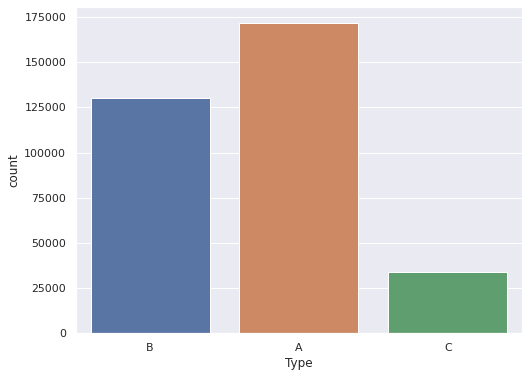

In [27]:
#sample bar plot/countplot

sns.countplot(Train_df['Type'])

                               Visualising Categorical Features:                                


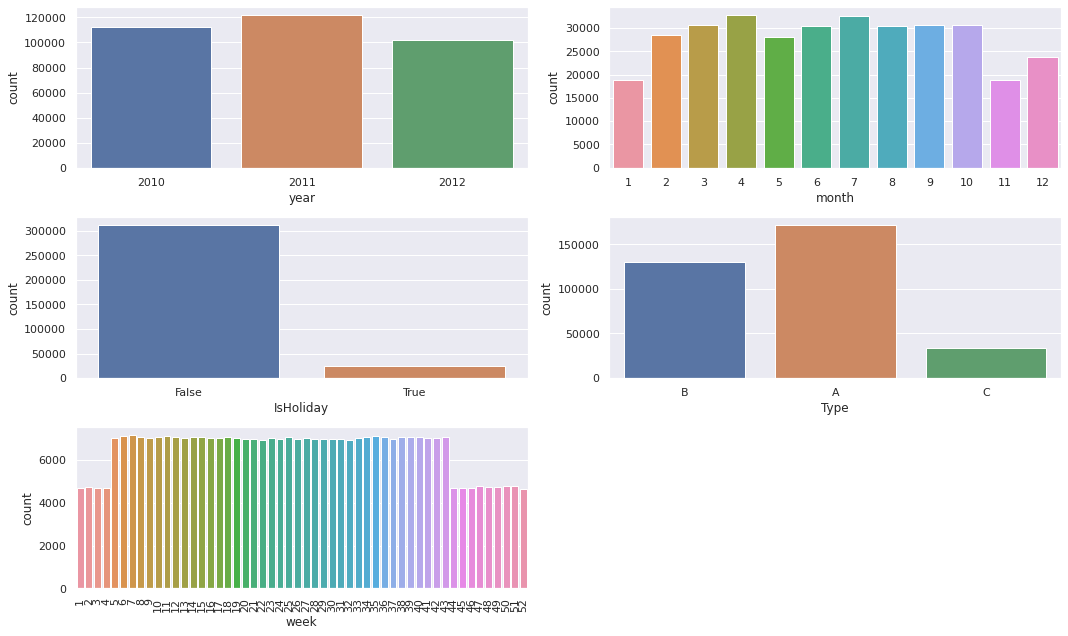

In [28]:
#Visualising the categorical features 

print('\033[1mVisualising Categorical Features:'.center(100))

n=2
plt.figure(figsize=[15,3*math.ceil(len(categoricalFeatures)/n)])

for i in range(len(categoricalFeatures)):
    if df[categoricalFeatures[i]].nunique()<=8:
        plt.subplot(math.ceil(len(categoricalFeatures)/n),n,i+1)
        sns.countplot(Train_df[categoricalFeatures[i]])
    else:
        plt.subplot(math.ceil(len(categoricalFeatures)/n),n,i+1)
        sns.countplot(Train_df[categoricalFeatures[i]])
plt.xticks(rotation=90)       
plt.tight_layout()
plt.show()

In [29]:
Train_df['Date'].head(5).append(Train_df['Date'].tail(5)) # to see first and last 5 rows.

115270   2011-10-28
298111   2012-09-07
263879   2011-11-04
104742   2012-08-03
365754   2011-07-08
339799   2010-11-26
253799   2011-10-21
210755   2012-07-20
56088    2012-10-26
300552   2011-03-04
Name: Date, dtype: datetime64[ns]

Our data is from 5th of February 2010 to 26th of October 2012.  

### Task 5 Explore impact of Holiday on weekly sales (5 mins)

1. What is the effect of different holidays on weekly sale?
2. What is the effect of Holidays on Weekly sale of differet sale type?

In [30]:
df_holiday = Train_df.loc[df['IsHoliday']==True]
df_holiday['Date'].unique() 

array(['2012-09-07T00:00:00.000000000', '2011-02-11T00:00:00.000000000',
       '2011-12-30T00:00:00.000000000', '2011-09-09T00:00:00.000000000',
       '2011-11-25T00:00:00.000000000', '2010-02-12T00:00:00.000000000',
       '2010-09-10T00:00:00.000000000', '2012-02-10T00:00:00.000000000',
       '2010-12-31T00:00:00.000000000', '2010-11-26T00:00:00.000000000'],
      dtype='datetime64[ns]')

#### We have noted the following holidays for your reference
Holidays had enourmous affect on internet traffic. We managed to figure out the following date mapping

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13



The following cells also create a flag for each holiday to help you analyze weekly sale by each holiday type

In [31]:
# Super bowl dates in train set
Train_df.loc[(df['Date'] == '2010-02-12')|(Train_df['Date'] == '2011-02-11')|(Train_df['Date'] == '2012-02-10'),'Super_Bowl'] = True
Train_df.loc[(df['Date'] != '2010-02-12')&(Train_df['Date'] != '2011-02-11')&(Train_df['Date'] != '2012-02-10'),'Super_Bowl'] = False

# Labor day dates in train set
Train_df.loc[(Train_df['Date'] == '2010-09-10')|(Train_df['Date'] == '2011-09-09')|(Train_df['Date'] == '2012-09-07'),'Labor_Day'] = True
Train_df.loc[(Train_df['Date'] != '2010-09-10')&(Train_df['Date'] != '2011-09-09')&(Train_df['Date'] != '2012-09-07'),'Labor_Day'] = False

# Thanksgiving dates in train set
Train_df.loc[(Train_df['Date'] == '2010-11-26')|(Train_df['Date'] == '2011-11-25'),'Thanksgiving'] = True
Train_df.loc[(Train_df['Date'] != '2010-11-26')&(Train_df['Date'] != '2011-11-25'),'Thanksgiving'] = False

#Christmas dates in train set
Train_df.loc[(Train_df['Date'] == '2010-12-31')|(Train_df['Date'] == '2011-12-30'),'Christmas'] = True
Train_df.loc[(Train_df['Date'] != '2010-12-31')&(Train_df['Date'] != '2011-12-30'),'Christmas'] = False


<AxesSubplot:xlabel='Christmas', ylabel='Weekly_Sales'>

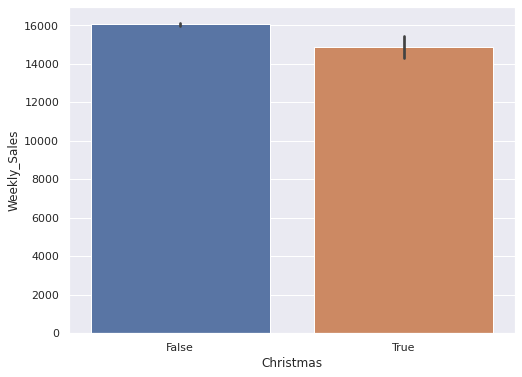

In [32]:
sns.barplot(x='Christmas', y='Weekly_Sales', data=Train_df) # Christmas holiday vs not-Christmas

<AxesSubplot:xlabel='Thanksgiving', ylabel='Weekly_Sales'>

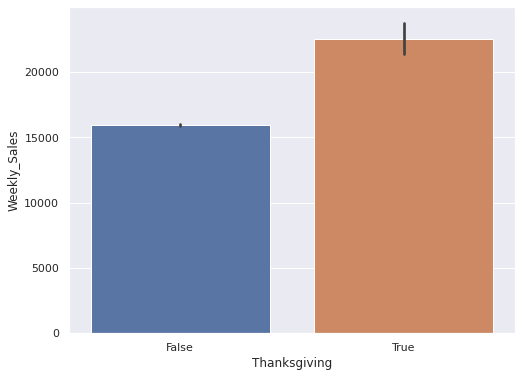

In [33]:
sns.barplot(x='Thanksgiving', y='Weekly_Sales', data=Train_df) # Thanksgiving holiday vs not-thanksgiving

<AxesSubplot:xlabel='Super_Bowl', ylabel='Weekly_Sales'>

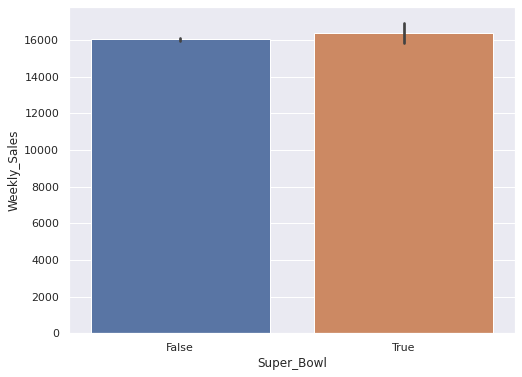

In [34]:
sns.barplot(x='Super_Bowl', y='Weekly_Sales', data=Train_df) # Super bowl holiday vs not-super bowl

<AxesSubplot:xlabel='Labor_Day', ylabel='Weekly_Sales'>

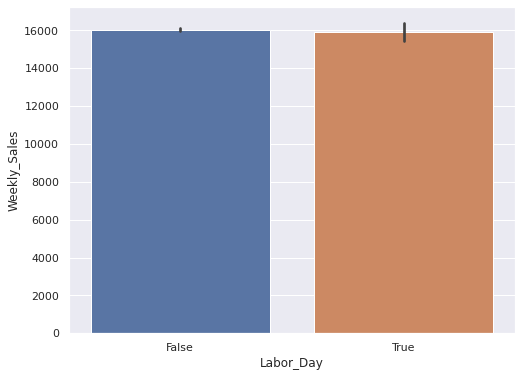

In [35]:
sns.barplot(x='Labor_Day', y='Weekly_Sales', data=Train_df) # Labor day holiday vs not-labor day

It is shown that for the graphs, Labor Day and Christmas do not increase weekly average sales. There is positive effect on sales in Super bowl, but the highest difference is in the Thanksgiving. I think, people generally prefer to buy Christmas gifts 1-2 weeks before Christmas, so it does not change sales in the Christmas week. And, there is Black Friday sales in the Thanksgiving week.

There are three different store types in the data as A, B and C.

In [36]:
Train_df.groupby(['Christmas','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Christmas 

Christmas  Type
False      A       20190.663904
           B       12334.724909
           C        9505.583909
True       A       18619.240155
           B       11605.885759
           C        8076.436528
Name: Weekly_Sales, dtype: float64

In [37]:
Train_df.groupby(['Labor_Day','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Labor Day

Labor_Day  Type
False      A       20174.710524
           B       12328.922976
           C        9481.187016
True       A       19899.263918
           B       12123.930764
           C        9725.698338
Name: Weekly_Sales, dtype: float64

In [38]:
Train_df.groupby(['Thanksgiving','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Thanksgiving

Thanksgiving  Type
False         A       20067.264416
              B       12217.872121
              C        9489.833939
True          A       27171.191836
              B       19693.627460
              C        9231.392651
Name: Weekly_Sales, dtype: float64

In [39]:
Train_df.groupby(['Super_Bowl','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Super Bowl

Super_Bowl  Type
False       A       20158.512318
            B       12320.155042
            C        9478.452902
True        A       20649.119740
            B       12529.357406
            C        9858.499287
Name: Weekly_Sales, dtype: float64

### Task 6 Understand distribution of Type variable and compare Weekly sale for different holidays side by side per store type (5 mins)

In [40]:
typePercentage = Train_df['Type'].value_counts(normalize=True)*100

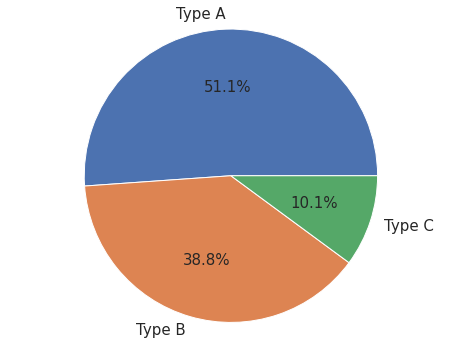

In [41]:
typePercent = list(typePercentage.values)  #percentages
typelabels = 'Type A','Type B', 'Type C' # labels
plt.pie(typePercent,labels=typelabels,autopct='%1.1f%%', textprops={'fontsize': 15}) #plot pie type and bigger the labels
plt.axis('equal')
mpl.rcParams.update({'font.size': 20}) #bigger percentage labels

plt.show()

In [42]:
Train_df.groupby('IsHoliday')['Weekly_Sales'].mean()

IsHoliday
False    15962.046633
True     17182.755376
Name: Weekly_Sales, dtype: float64

Nearly, half of the stores are belongs to Type A.

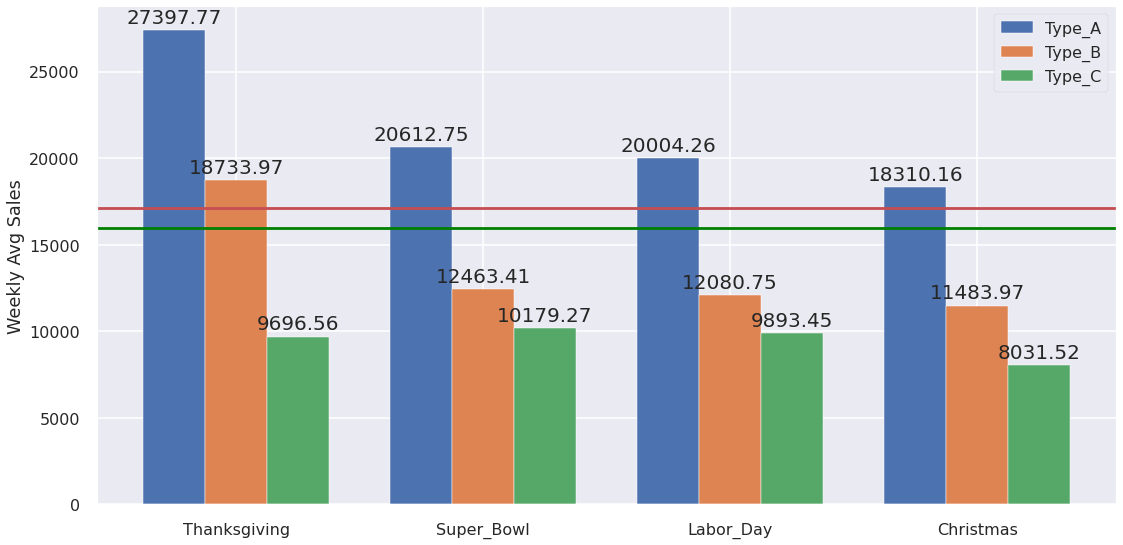

In [43]:
# Plotting avg wekkly sales according to holidays by types
plt.style.use('seaborn-poster')
labels = ['Thanksgiving', 'Super_Bowl', 'Labor_Day', 'Christmas']
A_means = [27397.77, 20612.75, 20004.26, 18310.16]
B_means = [18733.97, 12463.41, 12080.75, 11483.97]
C_means = [9696.56,10179.27,9893.45,8031.52]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x - width, A_means, width, label='Type_A')
rects2 = ax.bar(x , B_means, width, label='Type_B')
rects3 = ax.bar(x + width, C_means, width, label='Type_C')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Weekly Avg Sales')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.axhline(y=17094.30,color='r') # holidays avg
plt.axhline(y=15952.82,color='green') # not-holiday avg

fig.tight_layout()

plt.show()

It is seen from the graph that, highest sale average is in the Thanksgiving week between holidays. And, for all holidays Type A stores has highest sales.

In [44]:
Train_df.sort_values(by='Weekly_Sales',ascending=False).head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week,month,year,Super_Bowl,Labor_Day,Thanksgiving,Christmas
95373,10,72,2010-11-26,693099.36,True,55.33,3.162,NaN,NaN,NaN,NaN,NaN,126.669267,9.003,B,126512,47,11,2010,False,False,True,False
338013,35,72,2011-11-25,649770.18,True,47.88,3.492,1333.24,NaN,58563.24,20.97,6386.86,140.421786,8.745,B,103681,47,11,2011,False,False,True,False
95425,10,72,2011-11-25,630999.19,True,60.68,3.760,174.72,329.0,141630.61,79.00,1009.98,129.836400,7.874,B,126512,47,11,2011,False,False,True,False
337961,35,72,2010-11-26,627962.93,True,46.67,3.039,NaN,NaN,NaN,NaN,NaN,136.689571,8.763,B,103681,47,11,2010,False,False,True,False
195088,20,72,2010-11-26,422306.25,True,46.66,3.039,NaN,NaN,NaN,NaN,NaN,204.962100,7.484,A,203742,47,11,2010,False,False,True,False


Also, it is not surprise that top 5 highest weekly sales are belongs to Thanksgiving weeks.

### Task 7 What insights do you get from distribution of Size variable and Type of Store (5 mins)

In [45]:
Train_df.groupby('Type').describe()['Size'].round(2) # See the Size-Type relation

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
A,171843.0,182166.88,41656.73,39690.0,158114.0,202505.0,203819.0,219622.0
B,130375.0,101812.01,30920.70,34875.0,93188.0,114533.0,123737.0,140167.0
C,33945.0,40536.27,1194.48,39690.0,39690.0,39910.0,41062.0,42988.0


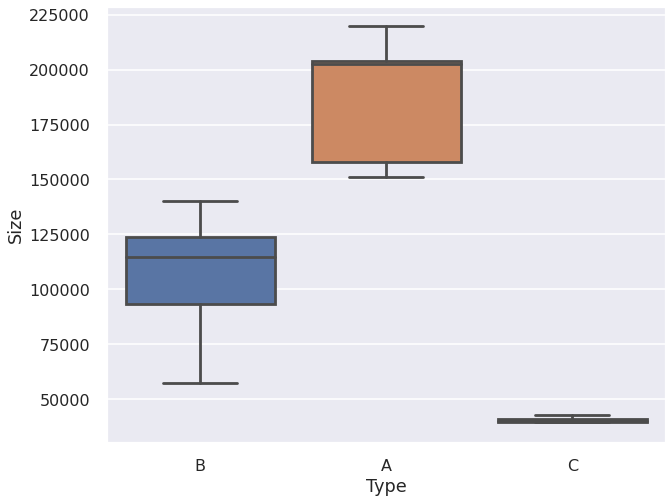

In [46]:
plt.figure(figsize=(10,8)) # To see the type-size relation
fig = sns.boxplot(x='Type', y='Size', data=Train_df, showfliers=False)

Size of the type of stores are consistent with sales, as expected. Higher size stores has higher sales. And, Walmart classify stores according to their sizes according to graph. After the smallest size value of Type A, Type B begins. After the smallest size value of Type B, Type C begins.

### Task 8 What is relation between Weekly sale across different departments? (5 mins)

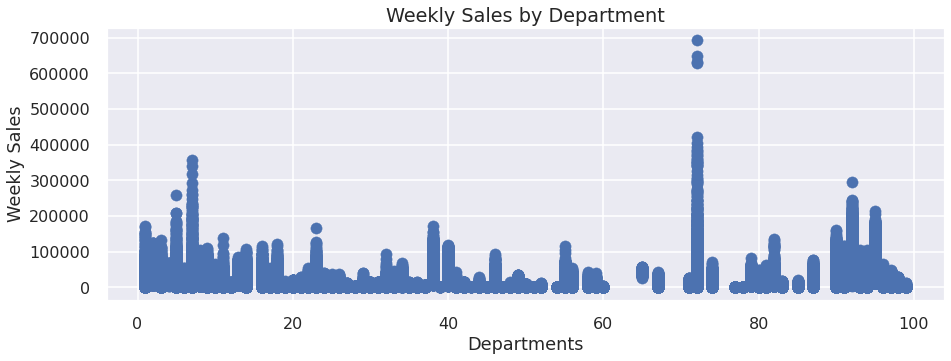

In [47]:
x = Train_df['Dept']
y = Train_df['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Department')
plt.xlabel('Departments')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

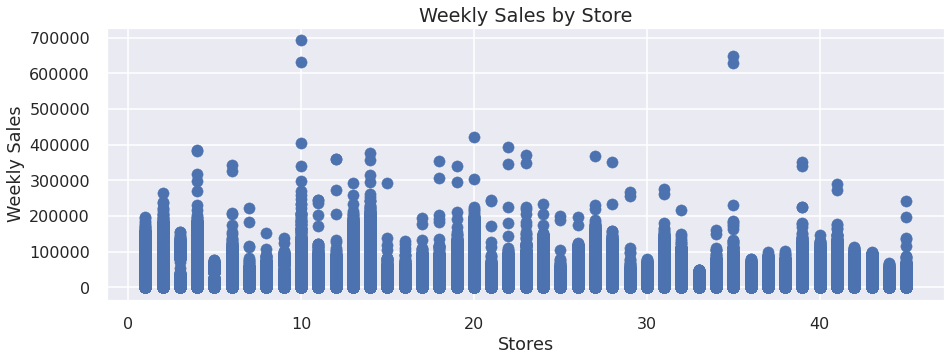

In [48]:
x = Train_df['Store']
y = Train_df['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Store')
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

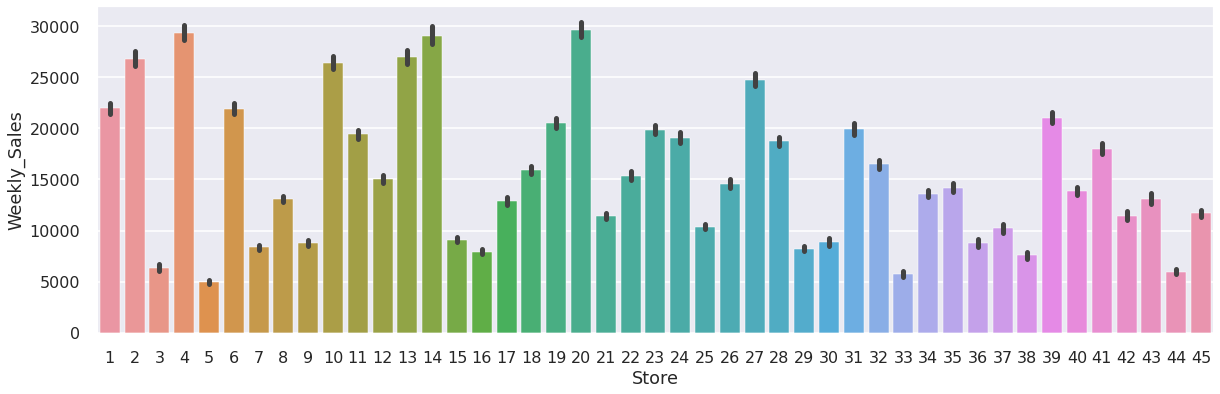

In [49]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='Store', y='Weekly_Sales', data=Train_df)

### Task 9 What is the relation between weekly sale and year/month/week? (10 mins)

<AxesSubplot:xlabel='month', ylabel='Weekly_Sales'>

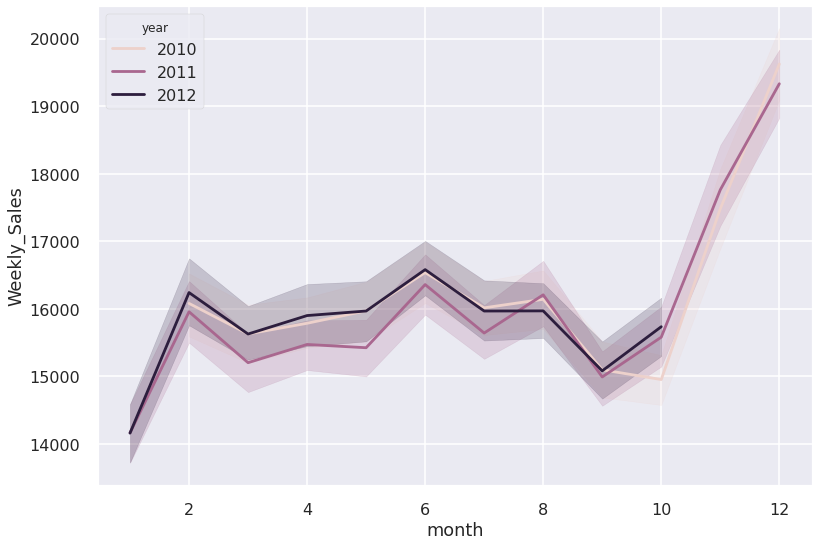

In [50]:
sns.lineplot(data=Train_df, x="month", y="Weekly_Sales", hue= "year")

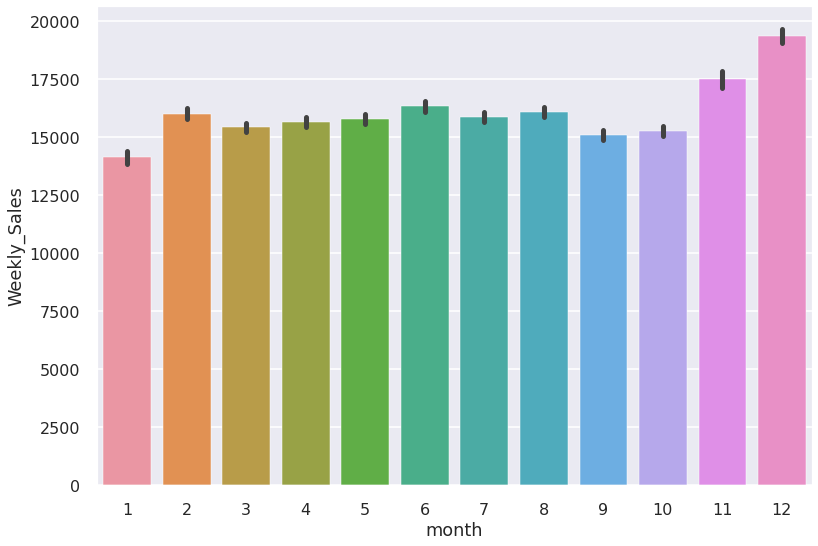

In [51]:
fig = sns.barplot(x='month', y='Weekly_Sales', data=df)

<AxesSubplot:xlabel='week', ylabel='Weekly_Sales'>

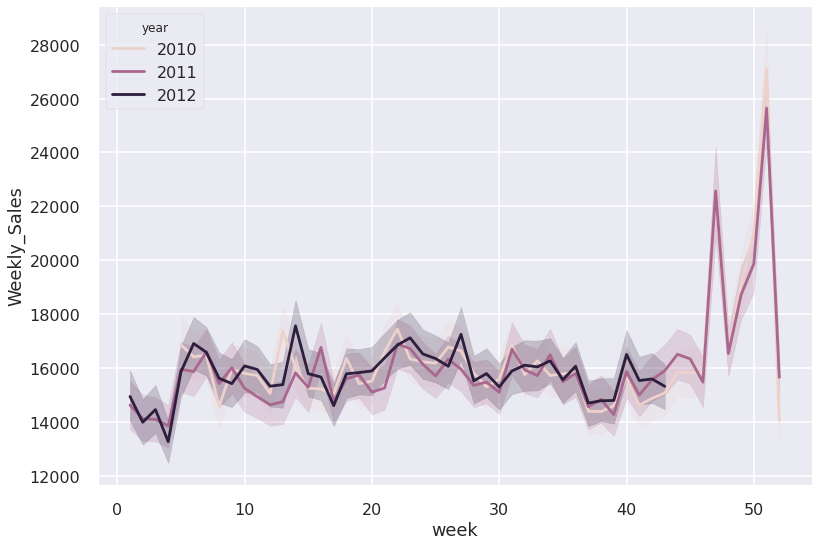

In [52]:
sns.lineplot(data=Train_df, x="week", y="Weekly_Sales", hue= "year")


### Task 10 Observe the relation between factors like Fuel price, Temperature on Weekly Sales (5 mins)

<AxesSubplot:xlabel='Fuel_Price', ylabel='Weekly_Sales'>

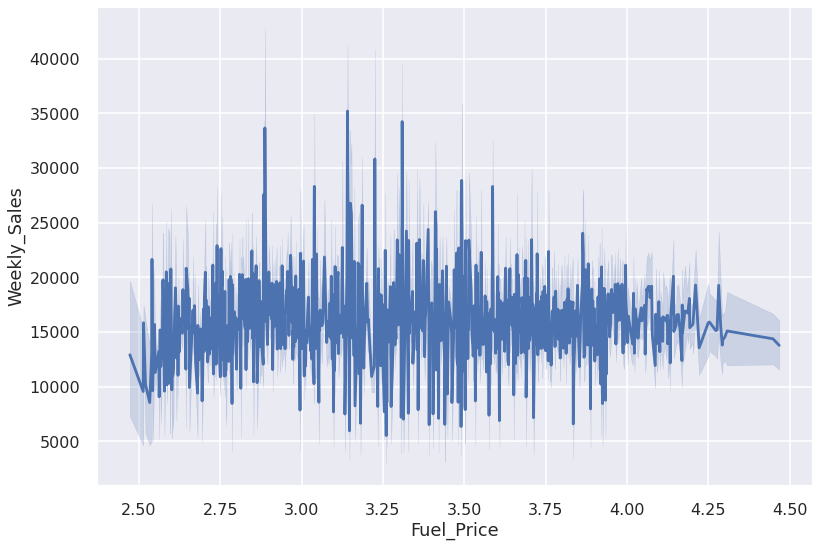

In [53]:
sns.lineplot(data=Train_df, x="Fuel_Price", y="Weekly_Sales")


<AxesSubplot:xlabel='Temperature', ylabel='Weekly_Sales'>

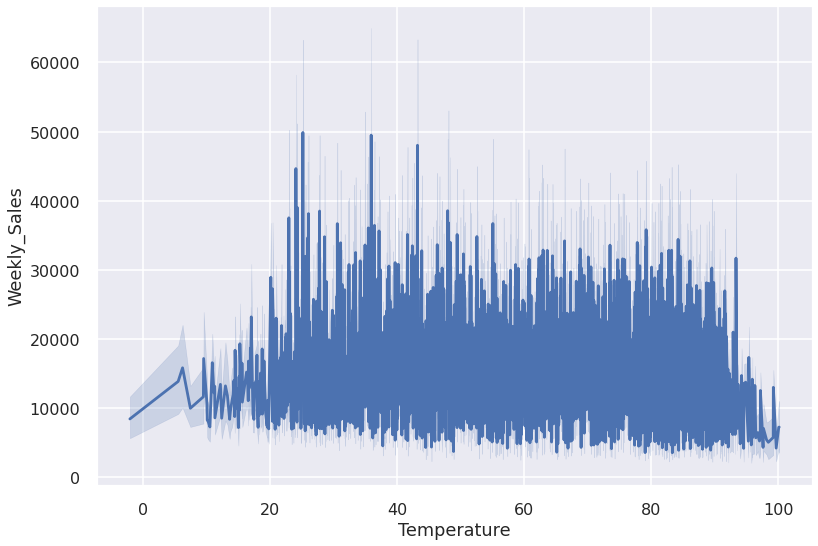

In [54]:
sns.lineplot(data=Train_df, x="Temperature", y="Weekly_Sales")


<AxesSubplot:xlabel='CPI', ylabel='Weekly_Sales'>

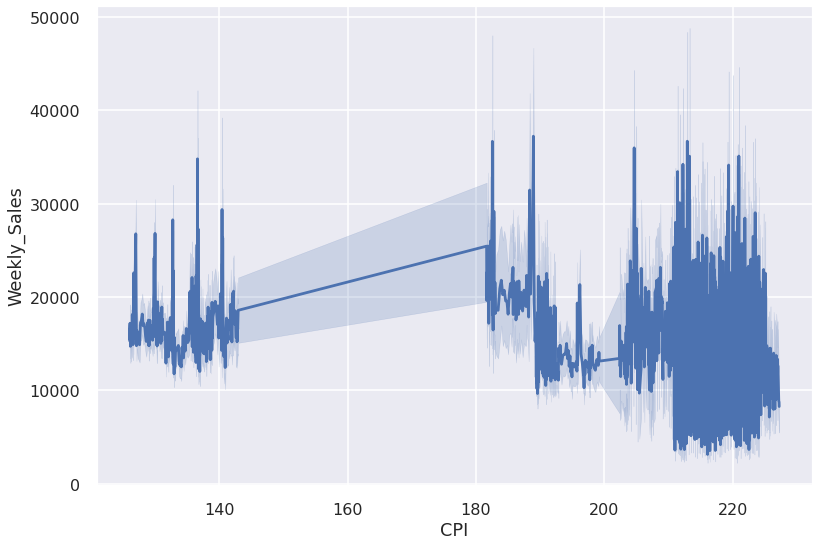

In [55]:
sns.lineplot(data=Train_df, x="CPI", y="Weekly_Sales")

<AxesSubplot:xlabel='Unemployment', ylabel='Weekly_Sales'>

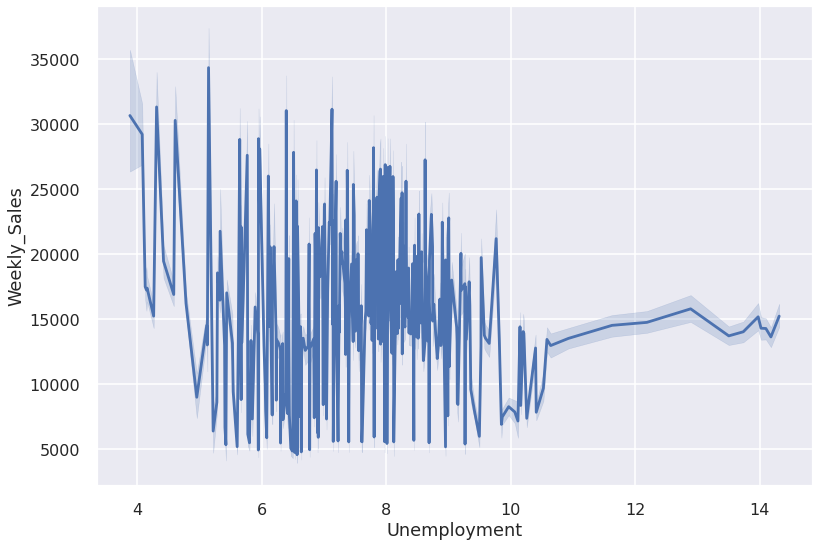

In [56]:
sns.lineplot(data=Train_df, x="Unemployment", y="Weekly_Sales")


## Data Wrangling and Data Cleaning
Data Wrangling and cleaning is a step where we clean the data of erroneous or outlier feature values to build more stable predictive models

### Task 1 Find the columns which has missing values (10 mins)
Missing value treatment is a crucial feature transformation steps. Features with nulls or wrong values needs to be filtered out. There is difference between wrong feature values and outliers.
Outliers are feature value which are feasible. Where as wrong feature value can be where value is practically imporssible eg. fuel price is negative.

1. Do you want to keep the features with missing value? Discuss the trade offs
2. If answer to 1. is yes, then how do you want to impute them? Discuss the trade offs


In [57]:
percent_missing = Train_df.isnull().sum() * 100 / len(Train_df)
missing_value_df = pd.DataFrame({'column_name': Train_df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending=[False])

In [58]:
missing_value_df

,column_name,percent_missing
MarkDown2,MarkDown2,73.572939
MarkDown4,MarkDown4,67.929844
MarkDown3,MarkDown3,67.439308
MarkDown1,MarkDown1,64.197428
MarkDown5,MarkDown5,64.018051
Type,Type,0.000000
Thanksgiving,Thanksgiving,0.000000
Labor_Day,Labor_Day,0.000000
Super_Bowl,Super_Bowl,0.000000
year,year,0.000000


In [59]:
Train_df_missing_treat = Train_df.fillna(0) # filling null's with 0

In [60]:
Test_df_missing_treat = Test_df.fillna(0) # filling null's with 0

In [61]:
Train_df_missing_treat.isna().sum() # last null check

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
week            0
month           0
year            0
Super_Bowl      0
Labor_Day       0
Thanksgiving    0
Christmas       0
dtype: int64

### Task 2 Outlier removal (15 mins)
Outlier are feature values which are rare in nature. Outliers unncessarily skew the data and causes problem to estimating model parameters. Outlier treatment also involves removing feature values which are unreliable - for eg. store with very few sale records etc.

1. Can you detect samples which are outlier values for a given features
2. Do you want to allow outliers? If no, then how are you going to deal with outliers?
3. Implement a simple way to treat outlier? For example you can use IQR measure for each numeric features. What techniques can you use for categorical features?

In [62]:
#Removal of outlier for numerical features

intermediateTrainData = Train_df_missing_treat.copy()
intermediateTestData = Test_df_missing_treat.copy()


intermediateTrainData['isOutlier'] = False
intermediateTestData['isOutlier'] = False

for i in numericalFeatures:
    Q1 = intermediateTrainData[i].quantile(0.25)
    Q3 = intermediateTrainData[i].quantile(0.75)
    IQR = Q3 - Q1
    intermediateTrainData['isOutlier'] = (intermediateTrainData['isOutlier'] == True) | (intermediateTrainData[i] > (Q3+(1.5*IQR))) | (intermediateTrainData[i] < (Q1-(1.5*IQR)))
    intermediateTestData['isOutlier'] = (intermediateTestData['isOutlier'] == True) | (intermediateTestData[i] > (Q3+(1.5*IQR))) | (intermediateTestData[i] < (Q1-(1.5*IQR)))
   
display(intermediateTrainData[intermediateTrainData['isOutlier'] == False].head())
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The Train dataset had {} samples.'.format(Train_df_missing_treat.shape[0]))
print('After removal of outliers, The Train dataset now has {} samples.'.format(intermediateTrainData[intermediateTrainData['isOutlier'] == False].shape[0]))

print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The Test dataset had {} samples.'.format(Test_df_missing_treat.shape[0]))
print('After removal of outliers, The Test dataset now has {} samples.'.format(intermediateTestData[intermediateTestData['isOutlier'] == False].shape[0]))

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week,month,year,Super_Bowl,Labor_Day,Thanksgiving,Christmas,isOutlier
298111,31,32,2012-09-07,4862.13,True,88.40,3.730,13401.91,61.94,511.63,2215.91,3508.73,222.074763,6.565,A,203750,36,9,2012,False,True,False,False,False
263879,27,59,2011-11-04,278.76,False,44.46,3.738,0.00,0.00,0.00,0.00,0.00,140.427976,7.906,A,204184,44,11,2011,False,False,False,False,False
104742,11,58,2012-08-03,3290.00,False,86.94,3.417,21974.47,173.58,25.50,22778.65,6172.69,225.463633,6.334,A,207499,31,8,2012,False,False,False,False,False
365754,39,35,2011-07-08,2055.03,False,84.33,3.480,0.00,0.00,0.00,0.00,0.00,214.024556,8.177,A,184109,27,7,2011,False,False,False,False,False
134185,14,50,2011-08-05,1945.00,False,78.22,3.842,0.00,0.00,0.00,0.00,0.00,186.373404,8.625,A,200898,31,8,2011,False,False,False,False,False



Inference:
Before removal of outliers, The Train dataset had 336163 samples.
After removal of outliers, The Train dataset now has 310523 samples.

Inference:
Before removal of outliers, The Test dataset had 84314 samples.
After removal of outliers, The Test dataset now has 77825 samples.


In [63]:
intermediateTrainData = intermediateTrainData[intermediateTrainData['isOutlier'] == False]

intermediateTestData = intermediateTestData[intermediateTestData['isOutlier'] == False]

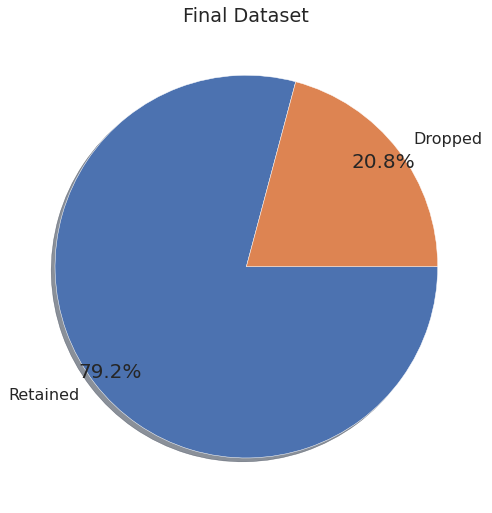


Inference: After the cleanup process, 111047 samples were dropped, while retaining 26.34% of the data.


In [64]:
#Final Dataset size after performing Preprocessing


plt.title('Final Dataset')
plt.pie([df.shape[0], df.shape[0]-intermediateTrainData.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False, 
        autopct='%1.1f%%', pctdistance=0.9, explode=[0,0], shadow=True)

plt.show()

print(f'\n\033[1mInference:\033[0m After the cleanup process, {df.shape[0]-intermediateTrainData.shape[0]} samples were dropped, \
while retaining {round(100 - (intermediateTrainData.shape[0]*100/(df.shape[0])),2)}% of the data.')

In [65]:
intermediateTrainData.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'week', 'month',
       'year', 'Super_Bowl', 'Labor_Day', 'Thanksgiving', 'Christmas',
       'isOutlier'],
      dtype='object')

In [66]:
intermediateTrainData.to_csv('clean_data.csv') # assign new data frame to csv for using after here



## Feature standardization, Categorical Feature transformation, Training a predictive model (10 mins)

Feature transformation helps in making the feature values in standard range. For numerical feature it means scaling the features so that different feature scale doesn't convey unrelated information to the model. 
Also predictive model doesn't understand categorical features in form of text. They needs to be encoded to numerical value - usually we follow one hot encoding representation for this.


1. Standardize numerical features
2. Transform categorical features - What feature transformation will you use?
3. Build a linear regression model and report R2 value (you will learn more details about the predictive modeling in Week 4. For now do this for completeness)

In [67]:

categoricalData_train = intermediateTrainData[categoricalFeatures]

categoricalData_test = intermediateTestData[categoricalFeatures]

ohE = OneHotEncoder(handle_unknown='ignore',sparse = False).fit(categoricalData_train)

categoricalData_train_transform = ohE.transform(categoricalData_train)
categoricalData_test_transform = ohE.transform(categoricalData_test)



In [68]:
numericalData_train = intermediateTrainData[numericalFeatures]
numericalData_test = intermediateTestData[numericalFeatures]
stdSc = StandardScaler().fit(numericalData_train)
numericalData_train_transform = stdSc.transform(numericalData_train)
numericalData_test_transform = stdSc.transform(numericalData_test)

In [69]:
numericalData_train_transform[0].shape

(4,)

In [70]:
X_train = np.hstack([categoricalData_train_transform,numericalData_train_transform])
X_test = np.hstack([categoricalData_test_transform,numericalData_test_transform])

y_train = intermediateTrainData['Weekly_Sales'].values
y_test = intermediateTestData['Weekly_Sales'].values

### Linear regression is a simple regression model. It tries to fit a linear relationship between the features and the output. 

In [71]:

model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [72]:

rms = mean_squared_error(y_test, y_predict, squared=False)
rms

21900.93225684372

In [73]:

r2 = r2_score(y_test, y_predict)
r2

0.07149758656976246

### Pipelines - end to end production ready Feature transformation and Modeling (20 mins)
In the last few tasks, we performed the following data cleaning and tranformation task - 1. Missing value treatment, 2. Outlier removal 3. Numerical feature normalization 4. categorical feature encoding.

This entire data processing, transformation, model training and inference task happens via a data pipeline. There are available libraries in python which can be directly applied to dataframe in a streamlined fashion. 

The whole entire task from data processing till model inference can be abstracted and streamlined in python using sklearn pipeline. We can plug in existing data processing, modeling libraries and also our own custom function.

Explore how you can use imblearn.pipeline to build more compact and functional Feature transformation pipeline and predictive model.

We also demo how the custom outlier detection function can be streamlined into this pipeline.

We can create multiple such pipeline, using different combination of feature transformation and model. Also pipelines can be seralized and stored using pickle and later loaded and applied to a different test data for prediction. In this way model training and inference becomes extremely streamlined and reliable.

Note: We are using imblearn.pipeline to create pipeline


https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html

Alternatively one can use:

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

https://towardsdatascience.com/step-by-step-tutorial-of-sci-kit-learn-pipeline-62402d5629b6

sklearn.pipeline doesn't allows custom function to be used in the pipeline unless it is written in specific format. Hence we can't use imbalance dataset library (more useful in classification problem). As a practice people prefer imblearn.pipeline

In [74]:
def CustomSampler_IQR (X, y, features = numericalFeatures):
    
    
    df = X.copy()
    df['Outcome'] = y
    
    indices = [x for x in df.index]    
    out_indexlist = []
        
    for col in features:
       
        #Using nanpercentile instead of percentile because of nan values
        Q1 = np.nanpercentile(df[col], 25.)
        Q3 = np.nanpercentile(df[col], 75.)
        
        cut_off = (Q3 - Q1) 
        upper, lower = Q3 + cut_off, Q1 - cut_off
                
        outliers_index = df[col][(df[col] < lower) | (df[col] > upper)].index.tolist()
        outliers = df[col][(df[col] < lower) | (df[col] > upper)].values        
        out_indexlist.extend(outliers_index)
        
    #using set to remove duplicates
    out_indexlist = list(set(out_indexlist))
    
    clean_data = np.setdiff1d(indices,out_indexlist)

    return X.loc[clean_data], y.loc[clean_data]

In [75]:
from imblearn.pipeline import Pipeline
from imblearn import FunctionSampler

numeric_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='mean'))
      ,('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='constant'))
      ,('encoder', OneHotEncoder())
])

In [76]:
preprocessor = ColumnTransformer(
   transformers=[
    ('numeric', numeric_transformer, numericalFeatures)
   ,('categorical', categorical_transformer, categoricalFeatures)
]) 

In [77]:

pipeline = Pipeline(steps = [
               ('Outlier_removal', FunctionSampler(func=CustomSampler_IQR, validate = False))
              ,('preprocessor', preprocessor)
              ,('regressor',LinearRegression())
           ])

In [78]:
X_train = Train_df[numericalFeatures+categoricalFeatures]
y_train = Train_df['Weekly_Sales']

In [79]:
reg_model = pipeline.fit(X_train,y_train)
print (reg_model)

Pipeline(steps=[('Outlier_removal',
                 FunctionSampler(func=<function CustomSampler_IQR at 0x7fb45cba0170>,
                                 validate=False)),
                ('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Temperature', 'CPI',
                                                   'Unemployment', 'Size']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='constant')),
        

In [80]:

y_test = Test_df['Weekly_Sales']
predictions = reg_model.predict(Test_df[numericalFeatures+categoricalFeatures])
print (r2_score(y_test, predictions))

0.06800167487992859


### Feature Selection (20 mins)
Feature selection is a task used to select the most important features and remove the unnecessary features.
1. How do you find important feature for numerical and categorical feature selection?
2. Why do you think we need to do feature selection? What is the problem with keeping unrelated features - think in terms of impact on technical debt and prediction performance
2. Explore Correlation, Anova and Mutual Information for feature selection
3. Which features do you think should be considered for the model?
4. Change the list of categorical and numerical features and retrain the model to see if we are seeing any performance improvement

In [81]:
#Using correlation for numerical Variable
corrNummerical = Train_df[numericalFeatures+['Weekly_Sales']]
corr = corrNummerical.apply(lambda x: pd.factorize(x)[0]).corr()
corr['featureName'] = corr.index

corr = corr[corr['featureName'] != 'Weekly_Sales'][['featureName','Weekly_Sales']]
corr.rename(columns={'Weekly_Sales':'correlation_Weekly_Sales'},inplace=True)

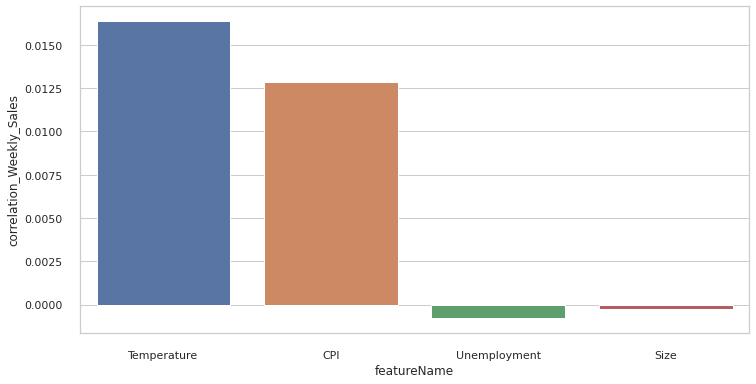

In [82]:
plt.figure(figsize=(12, 6))


sns.set_theme(style="whitegrid")

ax = sns.barplot(x="featureName", y="correlation_Weekly_Sales", data=corr)


In [83]:


categoricalPValue = []

for i in categoricalFeatures:
    CategoryGroupLists=Train_df.groupby(i)['Weekly_Sales'].apply(list)

    # Performing the ANOVA test
    # We accept the Assumption(H0) only when P-Value &gt; 0.05
    AnovaResults = f_oneway(*CategoryGroupLists)
    categoricalPValue.append(AnovaResults[1])
    
plt.figure(figsize=(12, 6))


anovaResult =  pd.DataFrame(
    {'featureName': categoricalFeatures,
     'pValues': categoricalPValue
    })
anovaResult

,featureName,pValues
0,year,3.139907e-08
1,month,1.411378e-182
2,IsHoliday,1.843517e-15
3,Type,0.000000e+00
4,week,0.000000e+00


<Figure size 864x432 with 0 Axes>

In [84]:

#we need to transform the categorical variable to numerical to train a perdictor
Train_df_cat =  pd.get_dummies(Train_df[categoricalFeatures], columns = categoricalFeatures)
Train_df_transformed = pd.concat([Train_df[numericalFeatures],Train_df_cat],axis = 1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(Train_df_transformed.values, Train_df['Weekly_Sales'].values, test_size=0.33, random_state=1)
# feature selection


In [85]:

def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
# load the dataset

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

In [86]:
features = Train_df_transformed.columns

Feature Temperature: 0.019180
Feature CPI: 0.030459
Feature Unemployment: 0.086190
Feature Size: 0.151160
Feature year_2010: 0.004678
Feature year_2011: 0.004487
Feature year_2012: 0.008315
Feature month_1: 0.001148
Feature month_2: 0.000000
Feature month_3: 0.000406
Feature month_4: 0.000000
Feature month_5: 0.000000
Feature month_6: 0.000413
Feature month_7: 0.001389
Feature month_8: 0.001350
Feature month_9: 0.000000
Feature month_10: 0.001193
Feature month_11: 0.001570
Feature month_12: 0.001042
Feature IsHoliday_False: 0.000170
Feature IsHoliday_True: 0.000034
Feature Type_A: 0.029198
Feature Type_B: 0.018827
Feature Type_C: 0.045270
Feature week_1: 0.000373
Feature week_2: 0.000290
Feature week_3: 0.000650
Feature week_4: 0.000956
Feature week_5: 0.000533
Feature week_6: 0.000000
Feature week_7: 0.000000
Feature week_8: 0.000000
Feature week_9: 0.000000
Feature week_10: 0.000100
Feature week_11: 0.000000
Feature week_12: 0.000000
Feature week_13: 0.000000
Feature week_14: 0.00000

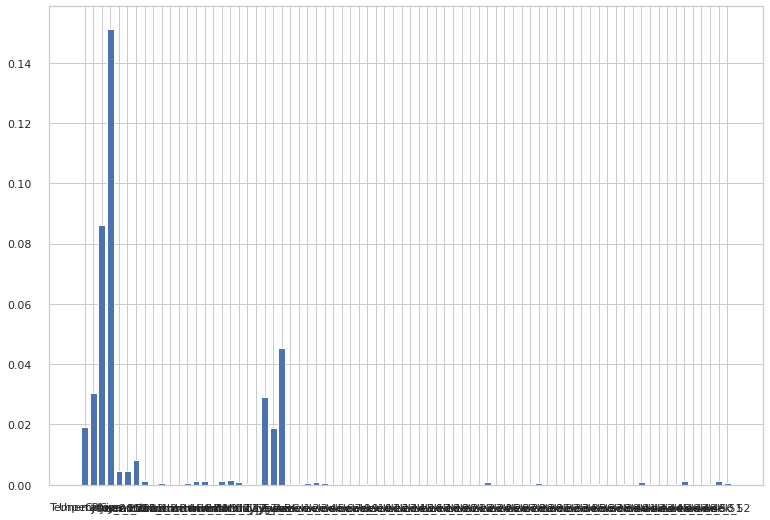

In [87]:
for i in range(len(fs.scores_)):
    print('Feature %s: %f' % (features[i], fs.scores_[i]))
# plot the scores
plt.bar([i for i in features], fs.scores_)
plt.show()